In [1]:
%matplotlib inline


# Linear regression

We are going to look at the relationship between age and
minutes played. Start by watching the video a

..  youtube:: TnOqoeVPnXE
   :width: 640
   :height: 349

Either work through the code at the same time as watching or afterwards.


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Opening data
In this example we use data downloaded from [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats) on players in La Liga.
We just use the age and minutes played columns.
And we only take the first 20 observations, to help visualise the process.
Download [playerstats.csv](https://github.com/soccermatics/Soccermatics/blob/main/course/lessons/lesson2/playerstats.csv)
your working directory.



In [3]:
num_obs=20
laliga_df=pd.read_excel("playerstats.xlsx")
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model = minutes_model.assign(age=laliga_df['Age'][0:num_obs])

#Make an age squared column so we can fir polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))

#Make an age cubic column so we can fir polynomial model.
minutes_model= minutes_model.assign(age_cubic = np.power(laliga_df.Age[0:num_obs],3))

In [4]:
minutes_model.head()

,minutes,age,age_squared,age_cubic
0,560,25.0,625.0,15625.0
1,2260,29.0,841.0,24389.0
2,1616,25.0,625.0,15625.0
3,360,20.0,400.0,8000.0
4,151,33.0,1089.0,35937.0


## Plotting the data
Start by plotting the data.



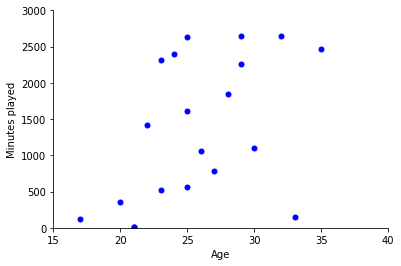

In [5]:
import seaborn as sns

fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

## Fitting the model
We are going to begin by doing a  straight line linear regression
 .. math::

    y = b_0 + b_1 x

A straight line relationship between minutes played and age.



In [6]:
model_fit=smf.ols(formula='minutes  ~ age   ', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Wed, 21 Sep 2022   Prob (F-statistic):             0.0318
Time:                        21:51:47   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

In [7]:
b =model_fit.params
b

Intercept   -1293.014693
age           102.540376
dtype: float64

Comparing the fit 
 ----------------------------
We now use the fit to plot a line through the data.
 .. math::

    y = b_0 + b_1 x

where the parameters are estimated from the model fit.



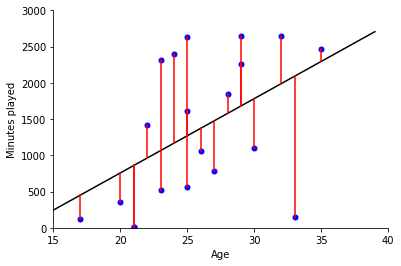

In [8]:
### First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0] + b[1] * x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['age']):

    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1] * a], color='red')
plt.show()

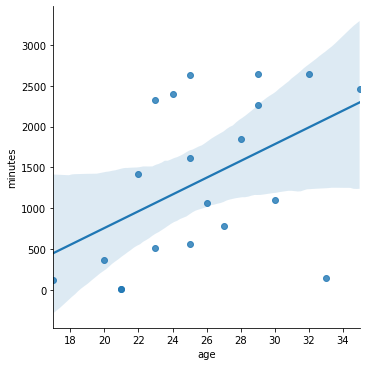

In [9]:
sns.lmplot(x="age", y="minutes", data=minutes_model)

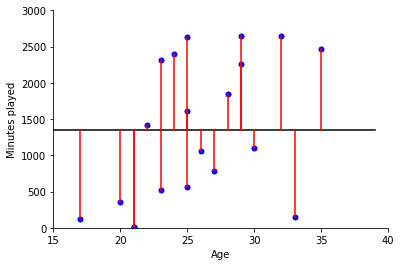

In [10]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= np.mean(minutes_model['minutes'])*np.ones(40)
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes']) ], color='red')
plt.show()

A model including squared terms
 ----------------------------
We now fit the quadratic model
 .. math::

    y = b_0 + b_1 x + b_2 x^2

estimating the parameters from the data.



                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Wed, 21 Sep 2022   Prob (F-statistic):             0.0512
Time:                        21:51:47   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

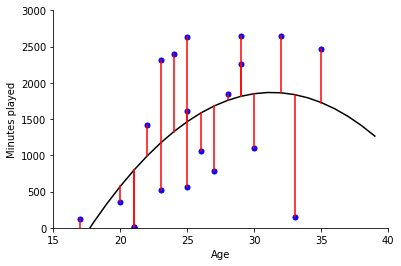

In [11]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

# Compare the fit 
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()

## Now try with all data points
1) Refit the model with all data points

2) Try adding a cubic term

3) Think about how well the model works. What are the limitations?



In [12]:
laliga_df.shape

(617, 34)

In [30]:
mins = laliga_df[['Min','Age']]
mins.dropna(inplace=True)
mins['Age'] = mins.Age.astype(int)
mins['age_squared'] = np.power(mins['Age'],2)
mins.head()

C:\Users\aleex\AppData\Local\Temp/ipykernel_5392/2572557263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mins.dropna(inplace=True)
C:\Users\aleex\AppData\Local\Temp/ipykernel_5392/2572557263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mins['Age'] = mins.Age.astype(int)
C:\Users\aleex\AppData\Local\Temp/ipykernel_5392/2572557263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Min,Age,age_squared
0,560,25,625
1,2260,29,841
2,1616,25,625
3,360,20,400
4,151,33,1089


In [31]:
mins.Age.unique()

array([25, 29, 20, 33, 21, 28, 17, 23, 22, 32, 35, 27, 30, 24, 26, 18, 38,
       19, 31, 34, 40, 16, 39, 36, 37])

In [32]:
model = smf.ols(formula = 'Min ~ Age ', data = mins).fit()
print(model.summary())
b=model.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.92
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           6.77e-17
Time:                        21:55:24   Log-Likelihood:                -5070.1
No. Observations:                 616   AIC:                         1.014e+04
Df Residuals:                     614   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.3642    207.420     -2.586      0.0

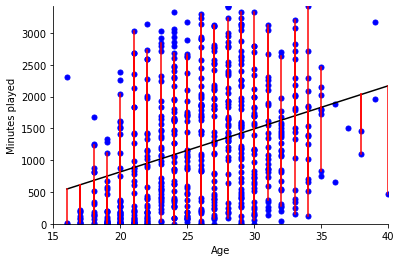

In [47]:
fig,ax=plt.subplots(num=1)
ax.plot(mins['Age'], mins['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,mins.Min.max()))

#Now create the line through the data
x=np.array(sorted(mins.Age.unique()))
y= b[0] + b[1] * x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(mins['Age'][:300]):
    ax.plot([a,a],[mins['Min'][i], b[0] + b[1] * a], color='red')
plt.show()

In [48]:
model = smf.ols(formula = 'Min ~ Age + age_squared', data = mins).fit()
print(model.summary())
b=model.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.41e-21
Time:                        21:59:21   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

In [50]:
b

Intercept     -5255.883343
Age             439.430056
age_squared      -7.088869
dtype: float64

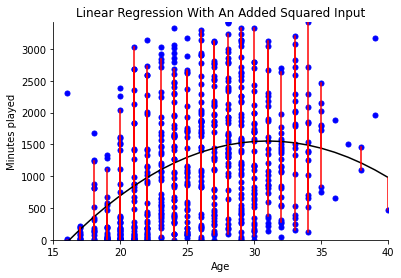

In [51]:
fig,ax=plt.subplots(num=1)
ax.plot(mins['Age'], mins['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,mins.Min.max()))

#Now create the line through the data
x= np.array(sorted(mins.Age.unique()))
y= b[0] + b[1]*x + b[2] * x*x
ax.plot(x, y, color='black')
ax.set_title('Linear Regression with an added squared input'.title())
#Show distances to line for each point
for i,a in enumerate(mins['Age'][:300]):
    ax.plot([a,a],[mins['Min'][i], b[0] + b[1]*a + b[2] * a*a], color='red')
plt.show()

In [52]:
mins['age_cubic'] = np.power(mins['Age'],3)
mins.head()

C:\Users\aleex\AppData\Local\Temp/ipykernel_5392/3240603147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mins['age_cubic'] = np.power(mins['Age'],3)


,Min,Age,age_squared,age_cubic
0,560,25,625,15625
1,2260,29,841,24389
2,1616,25,625,15625
3,360,20,400,8000
4,151,33,1089,35937


In [53]:
model = smf.ols(formula = 'Min ~ Age + age_cubic', data = mins).fit()
print(model.summary())
b=model.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     50.65
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.37e-21
Time:                        21:59:55   Log-Likelihood:                -5058.0
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3588.5626    648.697     -5.532      0.0

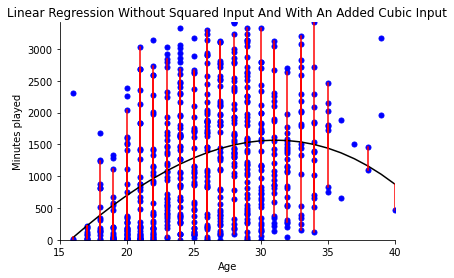

In [55]:
fig,ax=plt.subplots(num=1)
#mins = mins.iloc[:300]
ax.plot(mins['Age'], mins['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,mins.Min.max()))

#Now create the line through the data
x= np.array(sorted(mins.Age.unique()))
y= b[0] + b[1] * x + b[2] * x * x * x
ax.plot(x, y, color='black')
ax.set_title('Linear Regression without squared input and with an added cubic input'.title())
#Show distances to line for each point
for i,a in enumerate(mins['Age'][:300]):
    ax.plot([a,a],[mins['Min'][i], b[0] + b[1] * a + b[2]*a*a*a], color='red')
plt.show()

In [56]:
model = smf.ols(formula = 'Min ~ Age + age_squared + age_cubic', data = mins).fit()
print(model.summary())
b=model.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           8.73e-21
Time:                        22:00:11   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

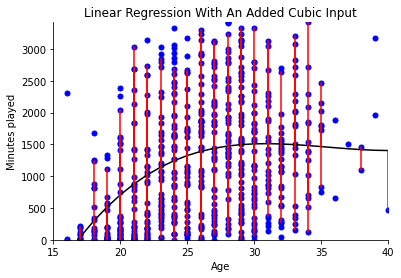

In [57]:
fig,ax=plt.subplots(num=1)
ax.plot(mins['Age'], mins['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
sns.despine()
plt.xlim((15,40))
plt.ylim((0,mins.Min.max()))

#Now create the line through the data
x= np.array(sorted(mins.Age.unique()))
y= b[0] + b[1] * x + b[2] * x * x + b[3] *x*x*x
ax.plot(x, y, color='black')
ax.set_title('Linear Regression with an added cubic input'.title())
#Show distances to line for each point
for i,a in enumerate(mins['Age'][:300]):
    ax.plot([a,a],[mins['Min'][i], b[0] + b[1] * a + b[2]*a*a + b[3]*a*a*a], color='red')
plt.show()